In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
fixed_acidity = 'fixed acidity'
volatile_acidity = 'volatile acidity'
citric_acid = 'citric acid'
residual_sugar = 'residual sugar'
chlorides = 'chlorides'
free_sulfur_dioxide = 'free sulfur dioxide'
total_sulfur_dioxide = 'total sulfur dioxide'
density = 'density'
pH = 'pH'
sulphates = 'sulphates'
alcohol = 'alcohol'
quality = 'quality'
qclass = 'qclass'

In [2]:
white = pd.read_csv("data/winequality-white1.csv")
red = pd.read_csv("data/winequality-red1.csv")
white_quality = white[quality]
red_quality = red[quality]
white_input = white.drop(quality,axis=1)
red_input = red.drop(quality,axis=1)
white_norm=(white_input-white_input.min())/(white_input.max()-white_input.min())
red_norm=(red_input-red_input.min())/(red_input.max()-red_input.min())

In [3]:
conditions = [(white['quality'] < 6),
              (white['quality'] > 6)]
choices = ['1_low', '3_high']
white['class'] = np.select(conditions, choices, default = '2_high')
white_norm['class']=white['class']
white['class'].value_counts()

2_high    2198
1_low     1640
3_high    1060
Name: class, dtype: int64

In [4]:
conditions = [(red['quality'] < 6),
              (red['quality'] > 6)]
choices = ['1_low', '3_high']
red['class'] = np.select(conditions, choices, default = '2_high')
red_norm['class']=red['class']
red['class'].value_counts()

1_low     744
2_high    638
3_high    217
Name: class, dtype: int64

Normalisierter Datensatz zwischen 0 und 1 unter white_norm/red_norm

In [5]:
white_norm.describe().style.set_precision(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
mean,0.2937,0.1944,0.2013,0.08883,0.1091,0.1161,0.3001,0.1334,0.4257,0.3138,0.4055
std,0.08114,0.09882,0.0729,0.07779,0.06483,0.05926,0.0986,0.05766,0.1373,0.1327,0.1985
min,0,0,0,0,0,0,0,0,0,0,0
25%,0.2404,0.1275,0.1627,0.01687,0.08012,0.07317,0.2297,0.08892,0.3364,0.2209,0.2419
50%,0.2885,0.1765,0.1928,0.07055,0.1009,0.1115,0.29,0.1278,0.4182,0.2907,0.3871
75%,0.3365,0.2353,0.2349,0.1426,0.1217,0.1533,0.3666,0.1733,0.5091,0.3837,0.5484
max,1,1,1,1,1,1,1,1,1,1,1


In [6]:
white.describe().style.set_precision(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
mean,6.855,0.2782,0.3342,6.391,0.04577,35.31,138.4,0.994,3.188,0.4898,10.51,5.878
std,0.8439,0.1008,0.121,5.072,0.02185,17.01,42.5,0.002991,0.151,0.1141,1.231,0.8856
min,3.8,0.08,0,0.6,0.009,2,9,0.9871,2.72,0.22,8,3
25%,6.3,0.21,0.27,1.7,0.036,23,108,0.9917,3.09,0.41,9.5,5
50%,6.8,0.26,0.32,5.2,0.043,34,134,0.9937,3.18,0.47,10.4,6
75%,7.3,0.32,0.39,9.9,0.05,46,167,0.9961,3.28,0.55,11.4,6
max,14.2,1.1,1.66,65.8,0.346,289,440,1.039,3.82,1.08,14.2,9


In [7]:
red_norm.describe().style.set_precision(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
mean,0.3292,0.2793,0.271,0.1122,0.126,0.2095,0.143,0.4902,0.4497,0.1965,0.3112
std,0.1541,0.1226,0.1948,0.09657,0.07857,0.1473,0.1162,0.1386,0.1216,0.1015,0.1639
min,0,0,0,0,0,0,0,0,0,0,0
25%,0.2212,0.1849,0.09,0.06849,0.09683,0.08451,0.05654,0.406,0.3701,0.1317,0.1692
50%,0.292,0.274,0.26,0.08904,0.1119,0.1831,0.1131,0.4905,0.4488,0.1737,0.2769
75%,0.4071,0.3562,0.42,0.1164,0.1302,0.2817,0.1979,0.5701,0.5197,0.2395,0.4154
max,1,1,1,1,1,1,1,1,1,1,1


In [8]:
red.describe().style.set_precision(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
mean,8.32,0.5278,0.271,2.539,0.08747,15.87,46.47,0.9967,3.311,0.6581,10.42,5.636
std,1.741,0.1791,0.1948,1.41,0.04707,10.46,32.9,0.001887,0.1544,0.1695,1.066,0.8076
min,4.6,0.12,0,0.9,0.012,1,6,0.9901,2.74,0.33,8.4,3
25%,7.1,0.39,0.09,1.9,0.07,7,22,0.9956,3.21,0.55,9.5,5
50%,7.9,0.52,0.26,2.2,0.079,14,38,0.9968,3.31,0.62,10.2,6
75%,9.2,0.64,0.42,2.6,0.09,21,62,0.9978,3.4,0.73,11.1,6
max,15.9,1.58,1,15.5,0.611,72,289,1.004,4.01,2,14.9,8


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


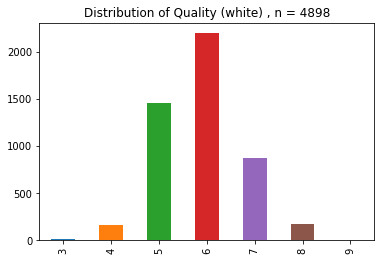

In [12]:
print(white['quality'].value_counts())
white['quality'].value_counts().sort_index().plot(kind='bar', title='Distribution of Quality (white) , n = '+str(white['quality'].count()))
plt.show()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


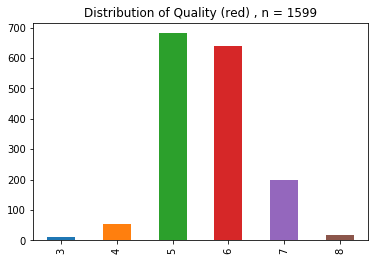

In [11]:
print(red['quality'].value_counts())
red['quality'].value_counts().sort_index().plot(kind='bar', title='Distribution of Quality (red) , n = '+str(red['quality'].count()))
plt.show()

Vorschlag für die Klassen: 3,4,5 (bad); 6 (average); 7,8,9 (good)

In [13]:
print('Share of rating 8 and up')
print(white.quality[white.quality > 7].count())
print(white.quality[white.quality <= 7].count())
print(str(white.quality[white.quality > 7].count()/white.quality.count()*100)+' %')

Share of rating 8 and up
180
4718
3.6749693752552064 %


In [ ]:
print('Share of Rating 7 and up')
print(white.quality[white.quality > 6].count())
print(white.quality[white.quality <= 6].count())
print(str(white.quality[white.quality > 6].count()/white.quality.count()*100)+' %')

In [ ]:
plt.figure(5,(5,20))
plot_y = white['quality']
i=1
curr_subplot={}
for k in white.keys():
    plot_x = white[k]
    curr_subplot[k] = plt.subplot(6,2,i)
    i = i + 1
    curr_subplot[k].set_title(k)
    curr_subplot[k].scatter(x=plot_x, y=plot_y)
curr_subplot['quality'].set_visible(False)

In [ ]:
plt.figure(5,(5,20))
plot_y = red['quality']
i=1
curr_subplot={}
for k in red.keys():
    plot_x = red[k]
    curr_subplot[k] = plt.subplot(6,2,i)
    i = i + 1
    curr_subplot[k].set_title(k)
    curr_subplot[k].scatter(x=plot_x, y=plot_y)
curr_subplot['quality'].set_visible(False)

In [ ]:
wcorr = white.corr()
wcorr.style.background_gradient().set_precision(1)

In [ ]:
for k1 in white.keys():
    print(k1+' (significance): ')
    for k2 in white.keys():
        print('\t'+k2+' '+ str(1-pearsonr(x=white[k1],y=white[k2])[1]))

In [ ]:
rcorr = red.corr()
rcorr.style.background_gradient().set_precision(1)

In [ ]:
for k1 in red.keys():
    print(k1+' (significance): ')
    for k2 in red.keys():
        print('\t'+k2+' '+ str(1-pearsonr(x=red[k1],y=red[k2])[1]))

In [ ]:
for k1 in white.keys():
    print(k1+' (significance): ')
    for k2 in white.keys():
        print('\t'+k2+' '+ str(1-pearsonr(x=white[k1],y=white[k2])[1]))


In [ ]:
v1= fixed_acidity
v2= alcohol

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [ ]:
v1= alcohol
v2= quality

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [ ]:
v1= quality
v2= residual_sugar

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [ ]:
v1= fixed_acidity
v2= chlorides

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [ ]:
v1= fixed_acidity
v2= chlorides

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white[v1], white[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [ ]:
v1= fixed_acidity
v2= free_sulfur_dioxide

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [ ]:
v1= fixed_acidity
v2= total_sulfur_dioxide

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [ ]:
v1= fixed_acidity
v2= density

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [ ]:
v1= fixed_acidity
v2= pH

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [ ]:
white_norm['quality'] = white['class']
red_norm['quality'] = str(red['class'])

In [ ]:
red_norm.describe()

In [ ]:
Z = linkage(white[[alcohol, pH]], 'ward')

plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('class')
plt.ylabel('distance')
dendrogram(Z, labels=white['class'].values)
plt.savefig('hierarchy.svg')
plt.show()

In [ ]:
plt.figure()
counter = 1
for i in [3,4]:
    plt.subplot(1,2,counter)
    counter += 1
    plt.tight_layout()
    plt.title('Dendrogram - {} clusters'.format(i))
    plt.xlabel('Count of Wines')
    plt.ylabel('distance')
    dendrogram(Z, truncate_mode='lastp', p=i)
plt.show()

In [ ]:
methods = ['single', 'average', 'complete']

plt.figure(1,(20,5))
y_axis = None
for i, method in enumerate(methods):
    y_axis = plt.subplot(1,4,i + 1, sharey = y_axis)
    plt.title('Dendrogram - method {}'.format(method))
    plt.xlabel('class')
    plt.ylabel('distance')
    dendrogram(
        linkage(white[['quality', 'alcohol']], method)
    )
plt.show()

In [ ]:
v1= volatile_acidity
v2= alcohol

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [ ]:
white.describe()

In [ ]:
white_data = white
white_target = white['class']
white_data = white_data.drop('quality',axis = 1)
white_data = white_data.drop('class', axis = 1)
print(white_data)
print(white_target)

In [ ]:
white_data_binned = pd.DataFrame(dict(
    fixed_acidity = pd.qcut(white_data['fixed acidity'], q=3, labels=['low', 'middle', 'high']),
    volatile_acidity = pd.qcut(white_data['volatile acidity'], q=3, labels=['low', 'middle', 'high']),
    citric_acid = pd.qcut(white_data['citric acid'], q=3, labels=['low', 'middle', 'high']),
    residual_sugar = pd.qcut(white_data['residual sugar'], q=3, labels=['low', 'middle', 'high']),
    chlorides = pd.qcut(white_data['chlorides'], q=3, labels=['low', 'middle', 'high']),
    free_sulfur_dioxide = pd.qcut(white_data['free sulfur dioxide'], q=3, labels=['low', 'middle', 'high']),
    total_sulfur_dioxide = pd.qcut(white_data['total sulfur dioxide'], q=3, labels=['low', 'middle', 'high']),
    density = pd.qcut(white_data['density'], q=3, labels=['low', 'middle', 'high']),
    pH = pd.qcut(white_data['pH'], q=3, labels=['low', 'middle', 'high']),
    sulphates = pd.qcut(white_data['sulphates'], q=3, labels=['low', 'middle', 'high']),
    alcohol = pd.qcut(white_data['alcohol'], q=3, labels=['low', 'middle', 'high']),
))

In [ ]:
white_data_binned_and_encoded = pd.get_dummies(white_data_binned)
print(white_data_binned_and_encoded)

In [ ]:
white_target.head()

In [ ]:
#define function for computing average roc for cross validation
#see http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from scipy import interp
from sklearn.metrics import roc_curve, auc, accuracy_score 

def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]
    tprs = []
    aucs = []
    
    for train_indices, test_indices in cv.split(data, target):
        train_data = data[train_indices]
        train_target = target[train_indices]
        estimator.fit(train_data, train_target)

        test_data = data[test_indices]
        test_target = target[test_indices]
        decision_for_each_class = estimator.predict_proba(test_data)#have to use predict_proba or decision_function 
        print(classification_report(test_target, estimator.predict(test_data)))
        
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 # tprs[-1] access the last element
        aucs.append(auc(fpr, tpr))
        
        #plt.plot(fpr, tpr)# plot for each fold
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0 # set the last tpr to 1
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    return mean_fpr, mean_tpr, mean_auc, std_auc

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.metrics import classification_report
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1337)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8) # draw diagonal

for n_neighbour in [1,2,3,4,5,6,7,8,9,10]:
    print(str(n_neighbour) + " neighbours:")
    knn_estimator = KNeighborsClassifier(n_neighbour)
    mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, knn_estimator, white_data.values, white_target, 'low')
    plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))
    print(str(n_neighbour)+ " neighbours//")
    
decision_tree = tree.DecisionTreeClassifier()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, decision_tree, white_data.values, white_target, 'low')
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

naive_bayes = GaussianNB()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, naive_bayes, white_data.values, white_target, 'low')
plt.plot(mean_fpr, mean_tpr, label='NaiveBayes (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()


In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8) # draw diagonal

for n_neighbour in [2,3,4,5,6]:
    knn_estimator = KNeighborsClassifier(n_neighbour)
    mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, knn_estimator, white_data.values, white_target, 'middle')
    plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))
    
decision_tree = tree.DecisionTreeClassifier()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, decision_tree, white_data.values, white_target, 'middle')
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

naive_bayes = GaussianNB()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, naive_bayes, white_data.values, white_target, 'middle')
plt.plot(mean_fpr, mean_tpr, label='NaiveBayes (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8) # draw diagonal

for n_neighbour in [2,3,4,5,6]:
    knn_estimator = KNeighborsClassifier(n_neighbour)
    mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, knn_estimator, white_data.values, white_target, 'high')
    plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))
    
decision_tree = tree.DecisionTreeClassifier()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, decision_tree, white_data.values, white_target, 'high')
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

naive_bayes = GaussianNB()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, naive_bayes, white_data.values, white_target, 'high')
plt.plot(mean_fpr, mean_tpr, label='NaiveBayes (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [ ]:
red = pd.read_csv("data/winequality-red1.csv")

In [ ]:
print(red['quality'].describe())
print(red['quality'].median())

In [ ]:
print(white['quality'].describe())
print(red['quality'].median())

In [ ]:
conditions = [(white['quality'] < 6),
              (white['quality'] > 6)]
choices = ['1_low', '3_high']
white['class'] = np.select(conditions, choices, default = '2_middle')
white['class'].value_counts()

In [ ]:
conditions = [(red['quality'] < 6),
              (red['quality'] > 6)]
choices = ['1_low', '3_high']
red['class'] = np.select(conditions, choices, default = '2_middle')
red['class'].value_counts()